# Boston_Housing - Regression Analyses

## Import TensorFlow & Keras

- import TensorFlow

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

- GPU 설정 OFf

In [ ]:
tf.test.gpu_device_name()

''

- import Keras

In [ ]:
import keras
keras.__version__

'2.4.3'

# Ⅰ. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (X_test, y_test) = boston_housing.load_data()
# train : validation : test로 split할 것이기 때문에, 
# X_train + X_validation = train_data로 y_train + y_validation = train_targets으로 지정

57344/57026 [==============================] - 0s 0us/step


> ## 2) Data_Set Information

In [ ]:
print(train_data.shape)
print(X_test.shape)    # 총 데이터 개수 = 404 + 102 = 506개

print(train_targets[:10]) # y_train이라고 생각 
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# Ⅱ. Data Preprocessing

> ## 1) Standardization

- train_data & test_data

In [ ]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data = train_data - mean
train_data = train_data / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2045)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# Ⅲ. Boston_Housing Keras Modeling

> ## 1) Model Define

In [ ]:
from keras import models
from keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,))) # 13 * 64 + 64
boston.add(layers.Dense(64, activation = 'relu')) # 64 * 64 + 64
boston.add(layers.Dense(1)) # 64 * 1 + 1
# 마지막 노드에 activation function 적용하지 않는다. 수치예측이기 때문에 0~1로 나오지 않게 하기 위함

In [ ]:
boston.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [ ]:
boston.compile(loss = 'mse',
              optimizer = 'rmsprop',
              metrics = ['mae'])
              optimizer = 'rmsprop',
                            metrics = ['mae'])
# 수치예측이니까 손실함수는 mse로 지정 
# Metrics는 절댓값으로 봐야 오차측정이 쉽기 때문에 MAE 지정정

> ## 3) Model Fit

- 약 4분

In [ ]:
%%time
hist_boston = boston.fit(X_train, y_train,
                       epochs = 500,
                       batch_size = 1,
                       validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 388.8299 - mae: 16.6029 - val_loss: 52.3921 - val_mae: 4.6493
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 28.0101 - mae: 3.6969 - val_loss: 27.7882 - val_mae: 3.3415
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 13.5642 - mae: 2.7364 - val_loss: 22.8275 - val_mae: 2.9212
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 18.3884 - mae: 2.7604 - val_loss: 21.9688 - val_mae: 2.9052
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 20.4322 - mae: 2.7399 - val_loss: 19.6333 - val_mae: 2.5481
Epoch 6/500
323/323 [==============================] - 0s 1ms/step - loss: 9.2600 - mae: 2.3056 - val_loss: 18.0207 - val_mae: 2.8095
Epoch 7/500
323/323 [==============================] - 0s 1ms/step - loss: 9.7948 - mae: 2.1972 - val_loss: 20.0737 - val_mae: 2.7112
Epoch 8/500
323/323 [==============================] - 

> ## 4) Model Evaluate

In [ ]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :', test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 16.5149 - mae: 2.8732
MAE is : 2.8731863498687744


> ## 5) Visualization

- 전체 시각화

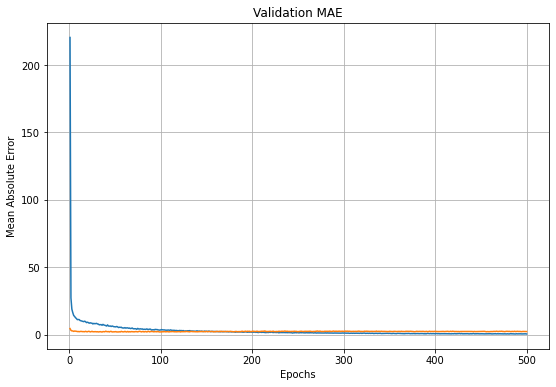

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_boston.history['loss'])
plt.plot(epochs, hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()
# loss가 초반에 너무 훅 떨어져서 잘 된 것인지 모르겠으니 초반 부분을 떼어내고 봐 보자

- 5번째 이후 MAE 확인

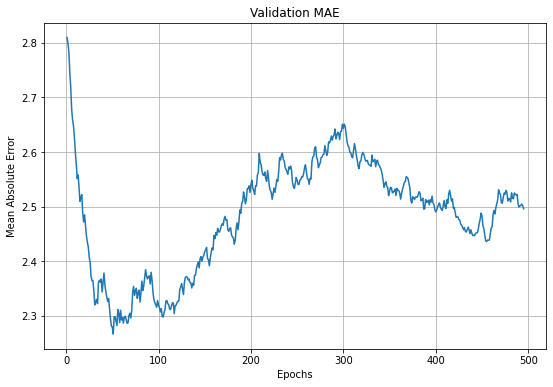

In [ ]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = hist_boston.history['val_mae']
mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()
# loss가 최소를 찍고 다시 올라가서 overfitting 경향을 띄는 것을 볼 수 있다

> ## 6) Keras Session Clear

In [ ]:
from keras import backend as K
K.clear_session()

# Ⅳ. Early Stopping


> ## 1) Model Define & Compile

In [ ]:
from keras import models
from keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,))) # 13 * 64 + 64
boston.add(layers.Dense(64, activation = 'relu')) # 64 * 64 + 64
boston.add(layers.Dense(1)) # 64 * 1 + 1

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 2) EarlyStopping( )

- monitor : 모니터링 대상 성능
- mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
- patience : 성능이 개선되지 않는 epoch 횟수

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)
# validation의 mae를 보고 싶다. 
# 최소값을 찾고
# 그로부터 50번을 진행할 동안 더 낮은 최소값이 안 나온다면 멈춰라

> ## 3) ModelCheckpoint( )

- 'best_boston.h5' : 최적모델이 저장될 경로
- save_best_only : 최적모델만 저장할지 지정

In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_boston.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

- callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [ ]:
%%time
hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 348.7691 - mae: 16.0484 - val_loss: 38.1955 - val_mae: 3.7803

Epoch 00001: val_mae improved from inf to 3.78032, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 26.1960 - mae: 3.6102 - val_loss: 26.6867 - val_mae: 3.1117

Epoch 00002: val_mae improved from 3.78032 to 3.11171, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 18.2800 - mae: 2.9535 - val_loss: 21.8266 - val_mae: 2.7580

Epoch 00003: val_mae improved from 3.11171 to 2.75798, saving model to best_boston.h5
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 16.6287 - mae: 2.6587 - val_loss: 18.4858 - val_mae: 2.6382

Epoch 00004: val_mae improved from 2.75798 to 2.63824, saving model to best_boston.h5
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 12.0899 - mae: 2.4669 - val_loss: 20.42

> ## 5) Best Model

In [ ]:
!ls -l

total 76
-rw-r--r-- 1 root root 70296 Mar 19 06:24 best_boston.h5
drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data


> ## 6) Model Evaluate

In [ ]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)
print('MAE is :', test_mae_score)
# earlystopping, modelcheckpoint 하기 전 mae = 2.873
# 적용 후 mae = 2.544로 효과가 있는 것을 확인

4/4 [==============================] - 0s 3ms/step - loss: 19.0758 - mae: 2.5440
MAE is : 2.5439627170562744


###
#The End
###